# IDA LAB 3

In [38]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [39]:
cereals = pd.read_csv(r"C:\\Users\Pravallika Gajul\Downloads\Cereals1.csv")
cereals

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
3,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
72,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
73,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
74,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


# QUESTION 1

In [3]:
#Question 1
#Create a table with the 5-number summary of all the numeric attributes

#using describe function of pandas library that shows the five number summary of the data in the last 5 rows
cereals.describe().tail(5)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
min,50.0,1.0,0.0,0.0,0.00,-1.0,-1.0,-1.0,0.0,1.0,0.5,0.25,18.042851
25%,100.0,2.0,0.0,132.5,0.75,12.0,3.0,40.0,25.0,1.0,1.0,0.67,32.932466
50%,110.0,2.5,1.0,180.0,1.75,14.5,7.0,90.0,25.0,2.0,1.0,0.75,40.253086
75%,110.0,3.0,2.0,212.5,3.00,17.0,11.0,120.0,25.0,3.0,1.0,1.00,50.780847
max,160.0,6.0,5.0,320.0,14.00,23.0,15.0,330.0,100.0,3.0,1.5,1.50,93.704912


# QUESTION 2

In [4]:
cereals[['protein' , 'fat' , 'sodium', 'fiber' , 'carbo' , 'sugars' , 'potass' , 'vitamins']][cereals.values==-1]

,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
3,2,2,200,1.0,14.0,8,-1,25
19,3,0,80,1.0,21.0,0,-1,0
56,5,2,0,2.7,-1.0,-1,110,0
56,5,2,0,2.7,-1.0,-1,110,0


In [5]:
cereals["carbo"].replace({-1 : cereals["carbo"].mean()}, inplace = True)
cereals["potass"].replace({-1:cereals["potass"].mean()}, inplace = True)
cereals["sugars"].replace({-1: cereals["sugars"].mean()}, inplace = True)
cereals

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.000000,0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.000000,25,3,1.0,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.000000,25,3,1.0,0.50,93.704912
3,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,93.657895,25,3,1.0,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.000000,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.000000,25,3,1.0,0.75,39.106174
72,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.000000,25,2,1.0,1.00,27.753301
73,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.000000,25,1,1.0,0.67,49.787445
74,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.000000,25,1,1.0,1.00,51.592193


# QUESTION 3

In [6]:
cereals.describe().tail(5)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
min,50.0,1.0,0.0,0.0,0.00,7.000000,0.0,15.00,0.0,1.0,0.5,0.25,18.042851
25%,100.0,2.0,0.0,132.5,0.75,12.000000,3.0,43.75,25.0,1.0,1.0,0.67,32.932466
50%,110.0,2.5,1.0,180.0,1.75,14.861842,7.0,90.00,25.0,2.0,1.0,0.75,40.253086
75%,110.0,3.0,2.0,212.5,3.00,17.000000,11.0,120.00,25.0,3.0,1.0,1.00,50.780847
max,160.0,6.0,5.0,320.0,14.00,23.000000,15.0,330.00,100.0,3.0,1.5,1.50,93.704912


There is change in the min of the columns carbohydrates, sugar and potassium.
But in general the other quartile values remain unchanged or only differ a little.
Thus, this strategy is good for dealing with noisy data

# QUESTION 4

For each of the numeric attributes (proteins upto vitamins), identify and replace all noisy data with the median of attribute.

In [7]:
median_p = cereals[cereals["potass"]>-1]
median_potass = median_p.potass.median()

median_c = cereals[cereals["carbo"]>-1]
median_carbo = median_c.carbo.median()

median_s = cereals[cereals["sugars"]>-1]
median_sugars = median_s.sugars.median()

print(median_potass)
print(median_carbo)
print(median_sugars)

90.0
14.861842105263158
7.0


In [8]:
cereals1 = cereals[['protein' , 'fat' , 'sodium' , 'fiber' , 'carbo' , 'sugars' , 'potass' , 'vitamins']]
s = pd.DataFrame(cereals1.describe().T)
s

,count,mean,std,min,25%,50%,75%,max
protein,76.0,2.526316,1.089020,1.0,2.00,2.500000,3.0,6.0
fat,76.0,1.013158,1.013159,0.0,0.00,1.000000,2.0,5.0
sodium,76.0,160.065789,84.318813,0.0,132.50,180.000000,212.5,320.0
fiber,76.0,2.048684,2.219038,0.0,0.75,1.750000,3.0,14.0
carbo,76.0,14.930575,3.737575,7.0,12.00,14.861842,17.0,23.0
sugars,76.0,7.038608,4.377048,0.0,3.00,7.000000,11.0,15.0
potass,76.0,96.148892,66.688658,15.0,43.75,90.000000,120.0,330.0
vitamins,76.0,28.289474,22.487813,0.0,25.00,25.000000,25.0,100.0


In [9]:
s["IQR"] = s["75%"] - s["25%"]
s

,count,mean,std,min,25%,50%,75%,max,IQR
protein,76.0,2.526316,1.089020,1.0,2.00,2.500000,3.0,6.0,1.00
fat,76.0,1.013158,1.013159,0.0,0.00,1.000000,2.0,5.0,2.00
sodium,76.0,160.065789,84.318813,0.0,132.50,180.000000,212.5,320.0,80.00
fiber,76.0,2.048684,2.219038,0.0,0.75,1.750000,3.0,14.0,2.25
carbo,76.0,14.930575,3.737575,7.0,12.00,14.861842,17.0,23.0,5.00
sugars,76.0,7.038608,4.377048,0.0,3.00,7.000000,11.0,15.0,8.00
potass,76.0,96.148892,66.688658,15.0,43.75,90.000000,120.0,330.0,76.25
vitamins,76.0,28.289474,22.487813,0.0,25.00,25.000000,25.0,100.0,0.00


In [10]:
s["LowerBound"] =s["25%"] - s["IQR"]*1.5
s["UpperBound"] = s["75%"] + s["IQR"]*1.5
s

,count,mean,std,min,25%,50%,75%,max,IQR,LowerBound,UpperBound
protein,76.0,2.526316,1.089020,1.0,2.00,2.500000,3.0,6.0,1.00,0.500,4.500
fat,76.0,1.013158,1.013159,0.0,0.00,1.000000,2.0,5.0,2.00,-3.000,5.000
sodium,76.0,160.065789,84.318813,0.0,132.50,180.000000,212.5,320.0,80.00,12.500,332.500
fiber,76.0,2.048684,2.219038,0.0,0.75,1.750000,3.0,14.0,2.25,-2.625,6.375
carbo,76.0,14.930575,3.737575,7.0,12.00,14.861842,17.0,23.0,5.00,4.500,24.500
sugars,76.0,7.038608,4.377048,0.0,3.00,7.000000,11.0,15.0,8.00,-9.000,23.000
potass,76.0,96.148892,66.688658,15.0,43.75,90.000000,120.0,330.0,76.25,-70.625,234.375
vitamins,76.0,28.289474,22.487813,0.0,25.00,25.000000,25.0,100.0,0.00,25.000,25.000


In [11]:
cereals1["protein"] = cereals1["protein"].mask(cereals1["protein"] >4.5, cereals1["protein"].median())
cereals1["sodium"] = cereals1["sodium"].mask(cereals1["sodium"] <12.5, cereals1["sodium"].median())
cereals1["fiber"] = cereals1["fiber"].mask(cereals1["fiber"] >6.37, cereals1["fiber"].median())
cereals1["potass"] = cereals1["potass"].mask(cereals1["potass"] >234.375, cereals1["potass"].median())
cereals1["vitamins"] = cereals1["vitamins"].mask(cereals1["vitamins"] >25, cereals1["vitamins"].median())


# QUESTION 5

In [40]:
cereals1.describe().tail(5)

,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
min,1.00,0.0,15.0,0.000,7.000000,0.0,15.00,0.0
25%,2.00,0.0,147.5,0.750,12.000000,3.0,43.75,25.0
50%,2.25,1.0,180.0,1.625,14.861842,7.0,90.00,25.0
75%,3.00,2.0,212.5,3.000,17.000000,11.0,110.00,25.0
max,4.00,5.0,320.0,6.000,23.000000,15.0,230.00,25.0


<AxesSubplot:xlabel='protein'>

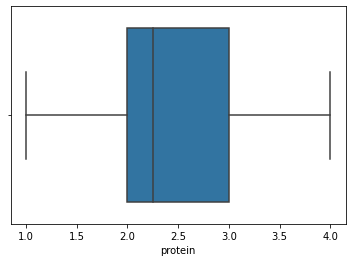

In [13]:
sns.boxplot(cereals1['protein'])

<AxesSubplot:xlabel='fat'>

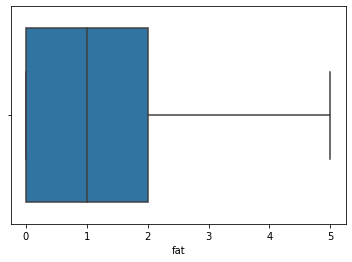

In [14]:
sns.boxplot(cereals1['fat'])

<AxesSubplot:xlabel='sodium'>

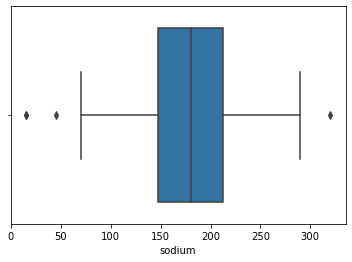

In [15]:
sns.boxplot(cereals1['sodium'])

<AxesSubplot:xlabel='fiber'>

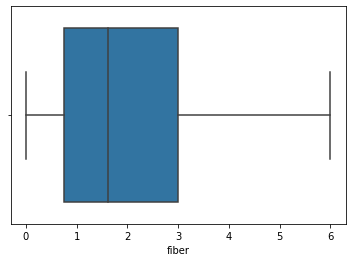

In [16]:
sns.boxplot(cereals1['fiber'])

<AxesSubplot:xlabel='carbo'>

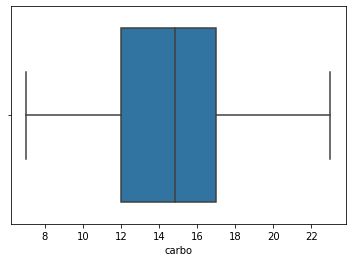

In [17]:
sns.boxplot(cereals1['carbo'])

<AxesSubplot:xlabel='sugars'>

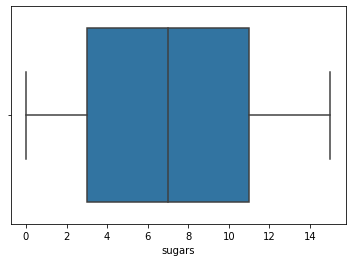

In [18]:
sns.boxplot(cereals1['sugars'])

<AxesSubplot:xlabel='potass'>

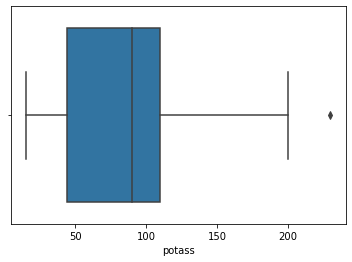

In [19]:
sns.boxplot(cereals1['potass'])

<AxesSubplot:xlabel='vitamins'>

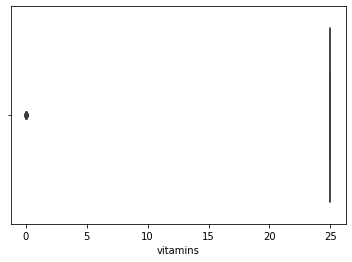

In [20]:
sns.boxplot(cereals1['vitamins'])

Cleaning noisy data does help a little. Changes in max and min values are observed however quartiles remain largely unchanged.

# QUESTION 6

In [21]:
pd.crosstab(cereals.mfr,cereals.type)

type,C,H
mfr,,
A,0,1
G,22,0
K,23,0
N,4,1
P,9,0
Q,7,1
R,8,0


# QUESTION 7

In [22]:
#7.1 Which is the cereal with the best rating
b=cereals['rating'].max()
best=cereals[cereals['rating']==b]
best 

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
2,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.5,93.704912


In [23]:
#7.2 which is the cereal with the worst rating
w = cereals['rating'].min()
worst = cereals[cereals['rating']==w]
worst

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
9,Cap'n'Crunch,Q,C,120,1,2,220,0.0,12.0,12.0,35.0,25,2,1.0,0.75,18.042851


# QUESTION 8

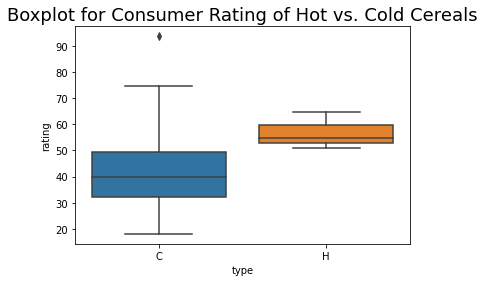

In [24]:
#8.lot a side-by-side boxplot comparing the consumer rating of hot vs. cold cereals
hot_cereals = cereals[cereals["type"]=='H']
cold_cereals = cereals[cereals["type"]=='C']
plt.figure()
sns.boxplot(x=cereals.type,y=cereals.rating)
plt.title("Boxplot for Consumer Rating of Hot vs. Cold Cereals",fontsize=18)
plt.show()

# QUESTION 9

<AxesSubplot:>

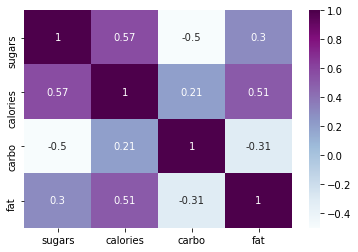

In [25]:
#9. Is there a relation between sugars, calories, carbs, and fat
cereals2 = cereals[['sugars' , 'calories' , 'carbo' , 'fat']]
c=cereals2.corr()
sns.heatmap(c,cmap="BuPu", annot=True)

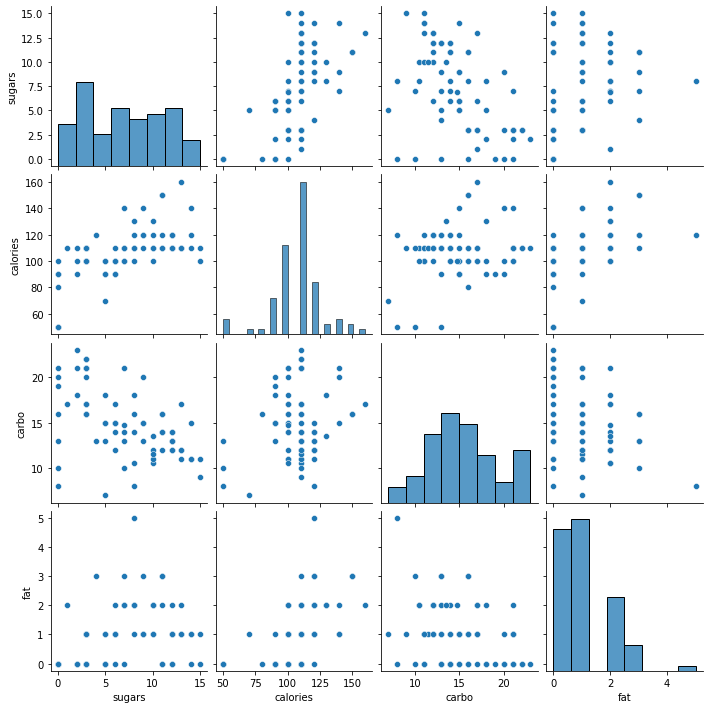

In [26]:
sns.pairplot(cereals[["sugars","calories","carbo","fat"]])

# QUESTION 10

In [27]:
#10. Which manufacturers produce cereal with highest calories? 
c=cereals['calories'].max()
highest=cereals[cereals['calories']==c]
highest

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
45,Mueslix_Crispy_Blend,K,C,160,3,2,150,3.0,17.0,13.0,160.0,25,3,1.5,0.67,30.313351


Kelloggs produces the cereal with the highest calories

# QUESTION 11

In [28]:
correlation = cereals["calories"].corr(cereals["rating"])
correlation

-0.6743360496799723

<AxesSubplot:>

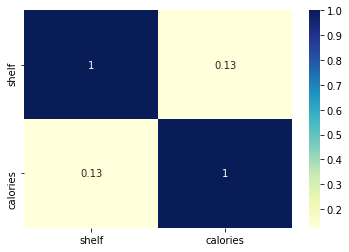

In [43]:
df1 = cereals[['shelf', 'calories']]
sns.heatmap(df4.corr(method='pearson'), cmap="YlGnBu", annot = True)

# QUESTION 12

In [29]:
correlatn = cereals["shelf"].corr(cereals["rating"])
correlatn

0.0019730207509652386

In [30]:
correlation = cereals[['rating' , 'shelf']].corr()
print(correlation)

          rating     shelf
rating  1.000000  0.001973
shelf   0.001973  1.000000


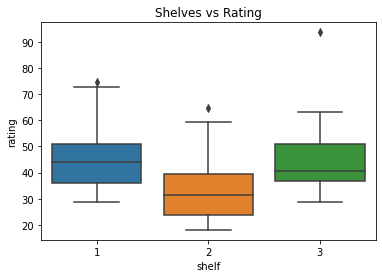

In [31]:
sns.boxplot(x = 'shelf', y = 'rating', data = cereals)
plt.title('Shelves vs Rating')
plt.show()

# QUESTION 13

<AxesSubplot:>

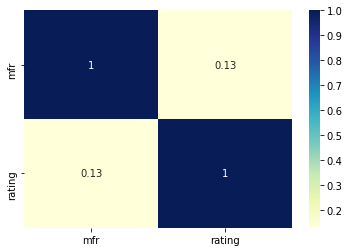

In [52]:
cereals2 = cereals.copy()
cereals2 = cereals2[['mfr','rating']]
sns.heatmap(cereals2.corr(), cmap="YlGnBu", annot=True)

There is not much relation between Manufacturer and Rating

# QUESTION 14

In [48]:
variety1=['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins','rating']
df1=cereals[variety1][cereals['rating']>50.7]
df1.corr(method='pearson')

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,rating
calories,1.000000,0.480686,0.329097,0.260754,-0.398579,0.379705,0.309334,-0.320946,0.332095,-0.595256
protein,0.480686,1.000000,0.598256,0.567629,0.153189,-0.203571,-0.078085,0.243976,0.311999,-0.188169
fat,0.329097,0.598256,1.000000,0.306848,-0.045681,-0.415487,-0.087430,0.112663,0.126428,-0.461869
sodium,0.260754,0.567629,0.306848,1.000000,0.324466,0.038546,0.217496,0.357794,0.599013,-0.267855
fiber,-0.398579,0.153189,-0.045681,0.324466,1.000000,-0.386531,0.032750,0.926158,0.280307,0.620996
carbo,0.379705,-0.203571,-0.415487,0.038546,-0.386531,1.000000,0.074584,-0.437242,0.044286,0.016012
sugars,0.309334,-0.078085,-0.087430,0.217496,0.032750,0.074584,1.000000,0.156163,0.757763,-0.451608
potass,-0.320946,0.243976,0.112663,0.357794,0.926158,-0.437242,0.156163,1.000000,0.358713,0.440688
vitamins,0.332095,0.311999,0.126428,0.599013,0.280307,0.044286,0.757763,0.358713,1.000000,-0.320625
rating,-0.595256,-0.188169,-0.461869,-0.267855,0.620996,0.016012,-0.451608,0.440688,-0.320625,1.000000


# QUESTION 15

In [49]:
def cost_function(X, y, theta):
    m = len(y)
    y_pred = X.dot(theta)
    cost = (y_pred - y)**2

    return np.sum(cost)/(2 * m)

<AxesSubplot:>

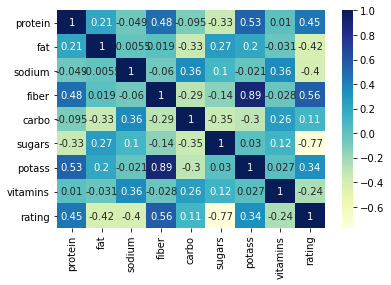

In [53]:
cereals3 = cereals.copy()
cereals3 = cereals3[['protein','fat','sodium','fiber','carbo','sugars','potass','vitamins', 'rating']]
sns.heatmap(cereals3.corr(), cmap="YlGnBu", annot=True)

In [62]:
X1 = np.array(cereals3['protein']).reshape(-1, 1)
y1= np.array(cereals3['rating']).reshape(-1, 1)
  
# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array 
# since each dataframe contains only one column
cereals3.dropna(inplace = True)
  
# Dropping any rows with Nan values
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.25)
  
# Splitting the data into training and testing data
regr = linear_model.LinearRegression()
  
regr.fit(X1_train, y1_train)
print(regr.score(X1_test, y1_test))

0.26819076618893933


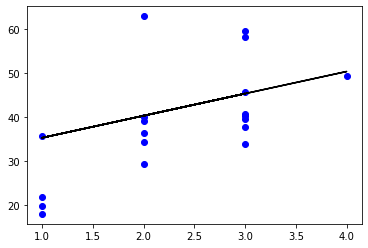

In [63]:
y1_pred = regr.predict(X1_test)
plt.scatter(X1_test, y1_test, color ='b')
plt.plot(X1_test, y1_pred, color ='k')
  
plt.show()

In [64]:
X2 = np.array(cereals3['fiber']).reshape(-1, 1)
y2= np.array(cereals3['rating']).reshape(-1, 1)
  
# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array 
# since each dataframe contains only one column
cereals3.dropna(inplace = True)
  
# Dropping any rows with Nan values
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2)
  
# Splitting the data into training and testing data
regr = linear_model.LinearRegression()
  
regr.fit(X2_train, y2_train)
print(regr.score(X2_test, y2_test))

0.17152684887236413


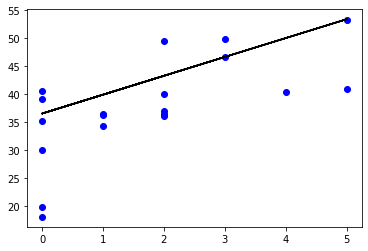

In [65]:
y2_pred = regr.predict(X2_test)
plt.scatter(X2_test, y2_test, color ='b')
plt.plot(X2_test, y2_pred, color ='k')
  
plt.show()

In [66]:
X3= np.array(cereals3['potass']).reshape(-1, 1)
y3= np.array(cereals3['rating']).reshape(-1, 1)
  
# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array 
# since each dataframe contains only one column
cereals3.dropna(inplace = True)
  
# Dropping any rows with Nan values
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3)
  
# Splitting the data into training and testing data
regr = linear_model.LinearRegression()
  
regr.fit(X3_train, y3_train)
print(regr.score(X3_test, y3_test))

-0.10235002373005253


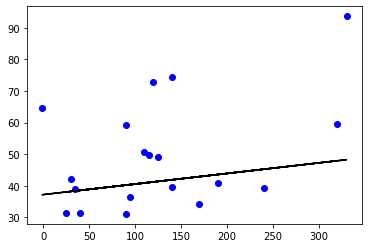

In [67]:
y3_pred = regr.predict(X3_test)
plt.scatter(X3_test, y3_test, color ='b')
plt.plot(X3_test, y3_pred, color ='k')
  
plt.show()